## Visualizations for results discussion

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde

In [2]:
HERE = Path.cwd().parent
FILE_SOURCE = HERE / "reports"
FIG_DIR = FILE_SOURCE / "figures" / "temporal"

plt.style.use(str(HERE.parent / "scientific.mplstyle"))

In [3]:
pca_filepath = FILE_SOURCE / "PCA_scores.csv"
pca_scores = pd.read_csv(pca_filepath)
pca_scores.columns = ["ID", "dataset"] + ["PC" + str(i + 1) for i in range(pca_scores.shape[1] - 2)]

var_filepath = FILE_SOURCE / "PCA_exp_var.csv"
pca_var = pd.read_csv(var_filepath, header=None)
pca_var.columns = ["PC" + str(i + 1) for i in range(pca_var.shape[1])]


In [4]:
pca_scores.head()

,ID,dataset,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,1,pseudoNPs,-0.024833,0.104562,1.760298,0.206507,-0.612944,-0.607628,-0.538048,-0.025155,-0.392756,0.437534
1,2,pseudoNPs,0.646020,0.078459,2.158877,1.051270,-0.214673,0.463155,-0.574623,0.368191,0.391560,-0.229586
2,3,pseudoNPs,0.012665,-0.043823,1.988124,0.467750,-0.073225,0.295571,-0.637119,-0.138615,-0.450258,0.513758
3,4,pseudoNPs,0.519309,0.073885,2.082936,0.969851,-0.238276,0.452181,-0.537552,0.385111,0.445055,-0.209199
4,5,pseudoNPs,1.539403,-0.219166,2.409035,1.818496,0.692777,2.401869,-0.713414,0.307662,1.165265,-0.869337


In [5]:
pca_var

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.357096,0.151093,0.126113,0.102649,0.06401,0.052216,0.041719,0.034616,0.023729,0.017702


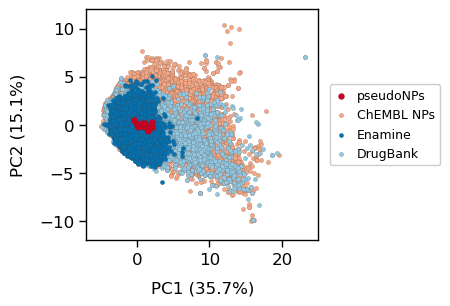

In [6]:
general_labels = {
    "pseudoNPs": "pseudoNPs",
    "chembl": "ChEMBL NPs",
    "enamine": "Enamine",
    "drugbank": "DrugBank"
}

general_colors = {
    "pseudoNPs": "#ca0020",
    "chembl": "#f4a582",
    "enamine": "#0571b0",
    "drugbank": "#92c5de"
}

general_order = {
    "pseudoNPs": 0.3,
    "chembl": 0,
    "enamine": 0.2,
    "drugbank": 0.1
}

general_size = {
    "pseudoNPs": 20,
    "chembl": 10,
    "enamine": 10,
    "drugbank": 10
}


fig = plt.figure()
ax = fig.add_subplot()
for data in pca_scores.dataset.unique():
    if data != "Sceletium":
        tmp = pca_scores.query("dataset == @data")
        ax.scatter(tmp["PC1"], tmp["PC2"],
                   s=general_size[data],
                   c=general_colors[data],
                   edgecolors=[0.25, 0.25, 0.25],
                   linewidths=0.1,
                   label=general_labels[data],
                   zorder=general_order[data])

ax.set(xlim=(-7, 25), ylim=(-12, 12))
plt.xlabel(f"PC1 ({pca_var.loc[0, "PC1"]:.1%})")
plt.ylabel(f"PC2 ({pca_var.loc[0, "PC2"]:.1%})")
plt.legend(loc="center right",
           bbox_to_anchor=(1.55, 0.5),
           fontsize=9,
           handlelength=1,
           frameon=True)
plt.savefig(FIG_DIR / "pca_score_plot_libraries.png",
            transparent=True, bbox_inches="tight")
plt.show()

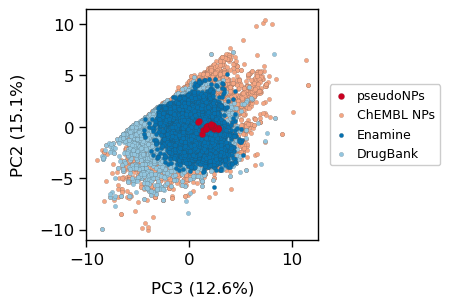

In [7]:
fig = plt.figure()
ax = fig.add_subplot()
for data in pca_scores.dataset.unique():
    if data != "Sceletium":
        tmp = pca_scores.query("dataset == @data")
        ax.scatter(tmp["PC3"], tmp["PC2"],
                   s=general_size[data],
                   c=general_colors[data],
                   edgecolors=[0.25, 0.25, 0.25],
                   linewidths=0.1,
                   label=general_labels[data],
                   zorder=general_order[data])

# ax.set(xlim=(-7, 25), ylim=(-12, 12))
plt.xlabel(f"PC3 ({pca_var.loc[0, "PC3"]:.1%})")
plt.ylabel(f"PC2 ({pca_var.loc[0, "PC2"]:.1%})")
plt.legend(loc="center right",
           bbox_to_anchor=(1.55, 0.5),
           fontsize=9,
           handlelength=1,
           frameon=True)
plt.show()

In [3]:
def prepare_alkaloid_comparison(df):
    comparisons = df.query("dataset in ['pseudoNPs', 'Sceletium', 'Hasubanan']").copy()
    comparisons["new_set"] = comparisons["dataset"]
    for file in ["Amaryllidaceae.csv", "MIAs.csv"]:
        idx = pd.read_csv(HERE / "data" / file)
        tmp = df.query("ID in @idx['chembl_id']").copy()
        tmp["new_set"] = file.split(".")[0]
        comparisons = pd.concat((comparisons, tmp), axis=0)
    return comparisons

In [4]:
comparisons = prepare_alkaloid_comparison(pca_scores)

NameError: name 'pca_scores' is not defined

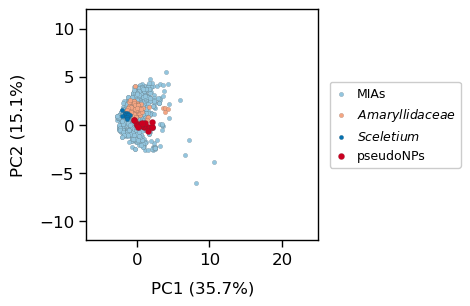

In [ ]:
family_labels = {
    "pseudoNPs": "pseudoNPs",
    "MIAs": "MIAs",
    "Amaryllidaceae": r"$\mathit{Amaryllidaceae}$",
    "Sceletium": r"$\mathit{Sceletium}$",
    "Hasubanan": "Hasubanan",
}

family_colors = {
    "pseudoNPs": "#ca0020",
    "MIAs": "#92c5de",
    "Amaryllidaceae": "#f4a582",
    "Sceletium": "#0571b0",
    "Hasubanan": "#ffffbf",
}

family_order = {
    "pseudoNPs": 0.4,
    "MIAs": 0,
    "Amaryllidaceae": 0.1,
    "Sceletium": 0.3,
    "Hasubanan": 0.2
}

family_size = {
    "pseudoNPs": 20,
    "MIAs": 10,
    "Amaryllidaceae": 10,
    "Sceletium": 10,
    "Hasubanan": 10
}

fig = plt.figure()
ax = fig.add_subplot()
# for data in comparisons.new_set.unique():
for data in ["MIAs", "Amaryllidaceae", "Hasubanan", "Sceletium", "pseudoNPs"]:
    idx = comparisons.query("new_set == @data").index
    ax.scatter(pca_scores.loc[idx, "PC1"], pca_scores.loc[idx, "PC2"],
                s=family_size[data],
                c=family_colors[data],
                edgecolors=[0.25, 0.25, 0.25],
                linewidths=0.1,
                label=family_labels[data],
                zorder=family_order[data])

ax.set(xlim=(-7, 25), ylim=(-12, 12))

plt.xlabel(f"PC1 ({pca_var.loc[0, "PC1"]:.1%})")
plt.ylabel(f"PC2 ({pca_var.loc[0, "PC2"]:.1%})")
plt.legend(loc="center right",
           bbox_to_anchor=(1.64, 0.5),
           fontsize=9,
           handlelength=1,
           frameon=True)
plt.savefig(FIG_DIR / "pca_score_plot_alkaloids.png",
            transparent=True, bbox_inches="tight")
plt.show()

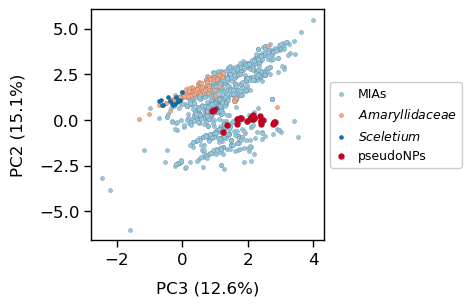

In [11]:
fig = plt.figure()
ax = fig.add_subplot()
# for data in comparisons.new_set.unique():
for data in ["MIAs", "Amaryllidaceae", "Sceletium", "pseudoNPs"]:
    idx = comparisons.query("new_set == @data").index
    ax.scatter(pca_scores.loc[idx, "PC3"], pca_scores.loc[idx, "PC2"],
                s=family_size[data],
                c=family_colors[data],
                edgecolors=[0.25, 0.25, 0.25],
                linewidths=0.1,
                label=family_labels[data],
                zorder=family_order[data])

# ax.set(xlim=(-7, 25), ylim=(-12, 12))

plt.xlabel(f"PC3 ({pca_var.loc[0, "PC3"]:.1%})")
plt.ylabel(f"PC2 ({pca_var.loc[0, "PC2"]:.1%})")
plt.legend(loc="center right",
           bbox_to_anchor=(1.62, 0.5),
           fontsize=9,
           handlelength=1,
           frameon=True)
plt.show()

In [5]:
pca_filepath = FILE_SOURCE / "PCA_scores_alkaloids.csv"
pca_scores = pd.read_csv(pca_filepath)
pca_scores.columns = ["ID", "new_set"] + ["PC" + str(i + 1) for i in range(pca_scores.shape[1] - 2)]

var_filepath = FILE_SOURCE / "PCA_exp_var_alkaloids.csv"
pca_var = pd.read_csv(var_filepath, header=None)
pca_var.columns = ["PC" + str(i + 1) for i in range(pca_var.shape[1])]


In [6]:
pca_scores.head()

,ID,new_set,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,CNP0424904.0,Hasubanan,3.121432,1.612843,0.144468,-1.812207,-0.527301,0.077260,0.370191,-0.284152,1.508984,0.434086
1,CNP0202494.1,Hasubanan,0.038029,1.179947,-1.569839,-1.683552,-0.304673,0.959506,0.044788,0.128296,0.112258,-0.150835
2,CNP0183649.1,Hasubanan,0.214050,2.130701,-1.433343,-0.478842,0.345864,0.616991,-0.738535,0.466265,0.379129,0.097659
3,CNP0260173.1,Hasubanan,5.763031,1.256182,2.181902,-2.366258,0.562858,-0.756935,-0.094123,0.922638,-0.700012,-0.556396
4,CNP0156932.0,Hasubanan,6.205493,0.731444,1.147180,-1.546969,1.055124,-0.779765,-0.466140,1.607851,-0.497168,-0.109381


In [7]:
pca_var

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.306239,0.283719,0.106528,0.072093,0.057592,0.04611,0.038669,0.028288,0.023258,0.016064


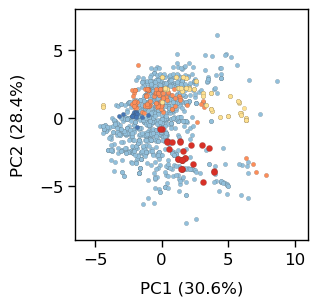

In [ ]:
family_labels = {
    "pseudoNPs": "pseudoNPs",
    "MIAs": "MIAs",
    "Amaryllidaceae": r"$\mathit{Amaryllidaceae}$",
    "Sceletium": r"$\mathit{Sceletium}$",
    "Hasubanan": "Hasubanan",
}

family_colors = {
    "pseudoNPs": "#d73027",
    "MIAs": "#91bfdb",
    "Amaryllidaceae": "#fc8d59",
    "Sceletium": "#4575b4",
    "Hasubanan": "#fee090",
}

family_order = {
    "pseudoNPs": 0.4,
    "MIAs": 0,
    "Amaryllidaceae": 0.1,
    "Sceletium": 0.3,
    "Hasubanan": 0.2
}

family_size = {
    "pseudoNPs": 20,
    "MIAs": 10,
    "Amaryllidaceae": 10,
    "Sceletium": 10,
    "Hasubanan": 10
}

fig = plt.figure()
ax = fig.add_subplot()
# for data in comparisons.new_set.unique():
for data in ["MIAs", "Amaryllidaceae", "Hasubanan", "Sceletium", "pseudoNPs"]:
    idx = pca_scores.query("new_set == @data").index
    ax.scatter(pca_scores.loc[idx, "PC1"], pca_scores.loc[idx, "PC2"],
                s=family_size[data],
                c=family_colors[data],
                edgecolors=[0.25, 0.25, 0.25],
                linewidths=0.1,
                label=family_labels[data],
                zorder=family_order[data])

ax.set(xlim=(-6.5, 11), ylim=(-9, 8))

plt.xlabel(f"PC1 ({pca_var.loc[0, "PC1"]:.1%})")
plt.ylabel(f"PC2 ({pca_var.loc[0, "PC2"]:.1%})")
# plt.legend(loc="center right",
#            bbox_to_anchor=(1.64, 0.5),
#            fontsize=9,
#            handlelength=1,
#            frameon=True)
plt.savefig(FIG_DIR / "20250919_pca_score_plot_alkaloids_alone.png",
            transparent=True, bbox_inches="tight")
plt.show()

In [ ]:

fig = plt.figure()
ax = fig.add_subplot()
# for data in comparisons.new_set.unique():
for data in ["MIAs", "Amaryllidaceae", "Hasubanan", "Sceletium", "pseudoNPs"]:
    idx = pca_scores.query("new_set == @data").index
    ax.scatter(pca_scores.loc[idx, "PC1"], pca_scores.loc[idx, "PC2"],
                s=family_size[data],
                c=family_colors[data],
                edgecolors=[0.25, 0.25, 0.25],
                linewidths=0.1,
                label=family_labels[data],
                zorder=family_order[data])

ax.set(xlim=(-6.5, 11), ylim=(-9, 8))

plt.xlabel(f"PC1 ({pca_var.loc[0, "PC1"]:.1%})")
plt.ylabel(f"PC2 ({pca_var.loc[0, "PC2"]:.1%})")
# plt.legend(loc="center right",
#            bbox_to_anchor=(1.64, 0.5),
#            fontsize=9,
#            handlelength=1,
#            frameon=True)
plt.savefig(FIG_DIR / "20250919_pca_score_plot_alkaloids_alone.png",
            transparent=True, bbox_inches="tight")
plt.show()

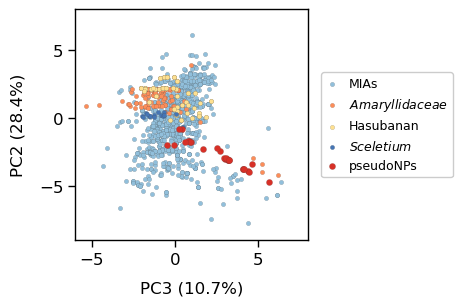

In [44]:
fig = plt.figure()
ax = fig.add_subplot()
# for data in comparisons.new_set.unique():
for data in ["MIAs", "Amaryllidaceae", "Hasubanan", "Sceletium", "pseudoNPs"]:
    idx = pca_scores.query("new_set == @data").index
    ax.scatter(pca_scores.loc[idx, "PC3"], pca_scores.loc[idx, "PC2"],
                s=family_size[data],
                c=family_colors[data],
                edgecolors=[0.25, 0.25, 0.25],
                linewidths=0.1,
                label=family_labels[data],
                zorder=family_order[data])

ax.set(xlim=(-6, 8), ylim=(-9, 8))

plt.xlabel(f"PC3 ({pca_var.loc[0, "PC3"]:.1%})")
plt.ylabel(f"PC2 ({pca_var.loc[0, "PC2"]:.1%})")
plt.legend(loc="center right",
           bbox_to_anchor=(1.65, 0.5),
           fontsize=9,
           handlelength=1,
           frameon=True)
plt.savefig(FIG_DIR / "20250919_pca_score_plot_alkaloids_alone_PC3.png",
            transparent=True, bbox_inches="tight")

plt.show()

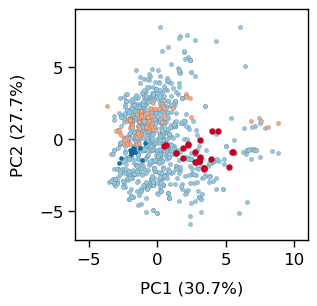

In [46]:
fig = plt.figure()
ax = fig.add_subplot()
# for data in comparisons.new_set.unique():
for data in ["MIAs", "Amaryllidaceae", "Sceletium", "pseudoNPs"]:
    idx = pca_scores.query("new_set == @data").index
    ax.scatter(pca_scores.loc[idx, "PC1"], pca_scores.loc[idx, "PC2"],
                s=family_size[data],
                c=family_colors[data],
                edgecolors=[0.25, 0.25, 0.25],
                linewidths=0.1,
                label=family_labels[data],
                zorder=family_order[data])

ax.set(xlim=(-6, 11), ylim=(-7, 9))

plt.xlabel(f"PC1 ({pca_var.loc[0, "PC1"]:.1%})")
plt.ylabel(f"PC2 ({pca_var.loc[0, "PC2"]:.1%})")
plt.show()

In [12]:
umap_filepath = HERE / "reports" / "UMAP_n10_d0_1.csv"
umap_scores = pd.read_csv(umap_filepath)
umap_scores.columns = ["ID", "dataset"] + ["D" + str(i + 1) for i in range(umap_scores.shape[1] - 2)]

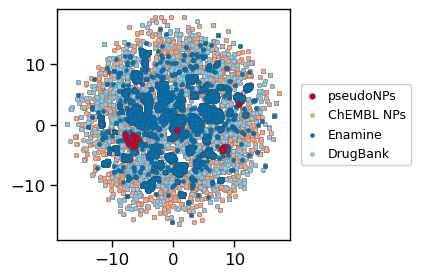

In [13]:
fig = plt.figure()
ax = fig.add_subplot()
for data in umap_scores.dataset.unique():
    if data != "Sceletium":
        tmp = umap_scores.query("dataset == @data")
        ax.scatter(tmp["D1"], tmp["D2"],
                   s=general_size[data],
                   c=general_colors[data],
                   edgecolors=[0.25, 0.25, 0.25],
                   linewidths=0.1,
                   label=general_labels[data],
                   zorder=general_order[data])

ax.set(xlim=(-19, 19), ylim=(-19, 19))
# plt.xlabel(f"PC1 ({pca_var.loc[0, "PC1"]:.1%})")
# plt.ylabel(f"PC2 ({pca_var.loc[0, "PC2"]:.1%})")
plt.legend(loc="center right",
           bbox_to_anchor=(1.55, 0.5),
           fontsize=9,
           handlelength=1,
           frameon=True)
plt.savefig(FIG_DIR / "umap_plot_libraries.png",
            transparent=True, bbox_inches="tight")
plt.show()

In [14]:
comparisons2 = prepare_alkaloid_comparison(umap_scores)

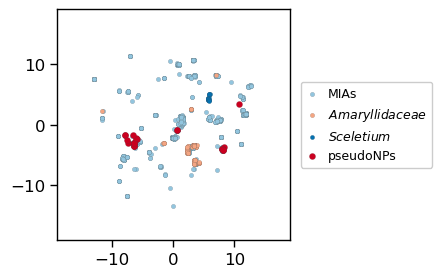

In [15]:
fig = plt.figure()
ax = fig.add_subplot()
# for data in comparisons.new_set.unique():
for data in ["MIAs", "Amaryllidaceae", "Sceletium", "pseudoNPs"]:
    idx = comparisons2.query("new_set == @data").index
    ax.scatter(umap_scores.loc[idx, "D1"], umap_scores.loc[idx, "D2"],
                s=family_size[data],
                c=family_colors[data],
                edgecolors=[0.25, 0.25, 0.25],
                linewidths=0.1,
                label=family_labels[data],
                zorder=family_order[data])

ax.set(xlim=(-19, 19), ylim=(-19, 19))

# plt.xlabel(f"PC1 ({pca_var.loc[0, "PC1"]:.1%})")
# plt.ylabel(f"PC2 ({pca_var.loc[0, "PC2"]:.1%})")
plt.legend(loc="center right",
           bbox_to_anchor=(1.64, 0.5),
           fontsize=9,
           handlelength=1,
           frameon=True)
plt.savefig(FIG_DIR / "umap_plot_alkaloids.png",
            transparent=True, bbox_inches="tight")
plt.show()

In [11]:
scores_filepath = FILE_SOURCE / "scores.csv"
scores = pd.read_csv(scores_filepath)

In [12]:
scores.head(2)

,ID,dataset,NP_likeness,QED,Boettcher,nSPS
0,CHEMBL1000,chembl,-1.211237,0.703894,233.323972,16.925926
1,CHEMBL100014,chembl,0.394408,0.515597,128.019550,10.857143


In [14]:
def prepare_scores(scores, prop, alkaloids=False):
    data = []
    labels = []
    c = []
    if alkaloids:
        for n, group in scores.groupby("new_set"):
            data.append(group[prop])
            labels.append(family_labels[n])
            c.append(family_colors[n])
    else:
        for n, group in scores.groupby("dataset"):
            if n not in ["Sceletium", "Hasubanan"]:
                data.append(group[prop])
                labels.append(general_labels[n])
                c.append(general_colors[n])

    return data, labels, c

In [15]:
def create_violin_plot(data, labels, colors, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot()

    parts = ax.violinplot(data,
                          showmedians=True)

    for i, body in enumerate(parts["bodies"]):
        body.set_facecolor(colors[i])
        body.set_edgecolor([0.25, 0.25, 0.25])
        body.set_linewidth(0.5)
        body.set_alpha(1)

    for key in ["cmedians", "cmins", "cmaxes", "cbars"]:
        parts[key].set_color([0.15, 0.15, 0.15])
        parts[key].set_linewidth(1)

    ax.set_xticks([x + 1 for x in range(len(data))],
                  labels=labels, rotation=45, ha="right", rotation_mode="anchor")

    ax.set_ylabel(ylabel)

    plt.show()
    return fig

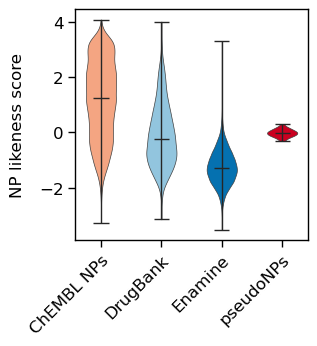

In [20]:
data, labels, c = prepare_scores(scores, prop="NP_likeness")
fig = create_violin_plot(data, labels, c, ylabel="NP likeness score")
fig.savefig(FIG_DIR / "NP_likeness_libraries.png",
            transparent=True, bbox_inches="tight")

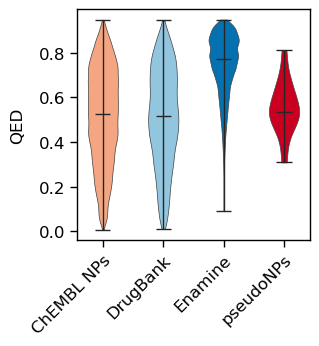

In [21]:
data, labels, c = prepare_scores(scores, prop="QED")
fig = create_violin_plot(data, labels, c, ylabel="QED")
fig.savefig(FIG_DIR / "QED_libraries.png",
            transparent=True, bbox_inches="tight")

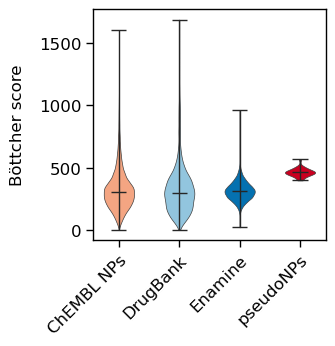

In [22]:
data, labels, c = prepare_scores(scores, prop="Boettcher")
fig = create_violin_plot(data, labels, c, ylabel="Böttcher score")
fig.savefig(FIG_DIR / "Boettcher_libraries.png",
            transparent=True, bbox_inches="tight")

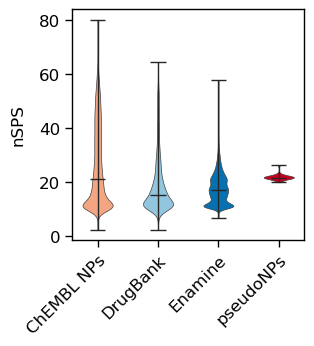

In [23]:
data, labels, c = prepare_scores(scores, prop="nSPS")
fig = create_violin_plot(data, labels, c, ylabel="nSPS")
fig.savefig(FIG_DIR / "nSPS_libraries.png",
            transparent=True, bbox_inches="tight")

In [16]:
comparisons3 = prepare_alkaloid_comparison(scores)

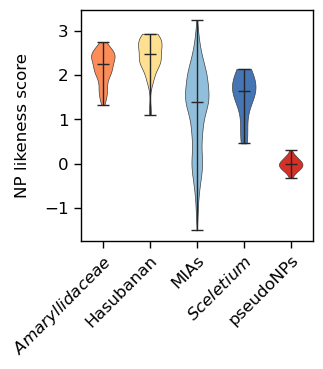

In [45]:
data, labels, c = prepare_scores(comparisons3, prop="NP_likeness", alkaloids=True)
fig = create_violin_plot(data, labels, c, ylabel="NP likeness score")
# fig.savefig(FIG_DIR / "NP_likeness_alkaloids.png",
#             transparent=True, bbox_inches="tight")
fig.savefig(FIG_DIR / "20250919_NP_likeness_alkaloids.png",
            transparent=True, bbox_inches="tight")

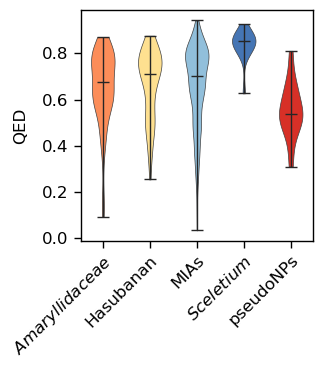

In [46]:
data, labels, c = prepare_scores(comparisons3, prop="QED", alkaloids=True)
fig = create_violin_plot(data, labels, c, ylabel="QED")
# fig.savefig(FIG_DIR / "QED_alkaloids.png",
#             transparent=True, bbox_inches="tight")
fig.savefig(FIG_DIR / "20250919_QED_alkaloids.png",
            transparent=True, bbox_inches="tight")

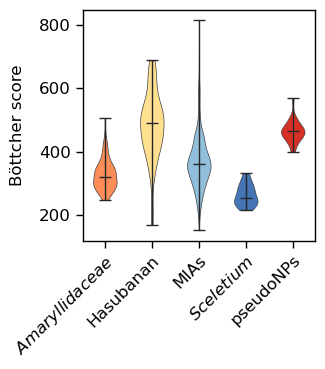

In [47]:
data, labels, c = prepare_scores(comparisons3, prop="Boettcher", alkaloids=True)
fig = create_violin_plot(data, labels, c, ylabel="Böttcher score")
# fig.savefig(FIG_DIR / "Boettcher_alkaloids.png",
#             transparent=True, bbox_inches="tight")
fig.savefig(FIG_DIR / "20250919_Boettcher_alkaloids.png",
            transparent=True, bbox_inches="tight")

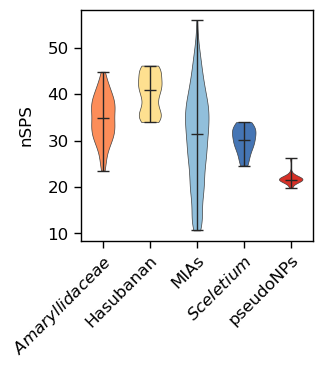

In [48]:
data, labels, c = prepare_scores(comparisons3, prop="nSPS", alkaloids=True)
fig = create_violin_plot(data, labels, c, ylabel="nSPS")
# fig.savefig(FIG_DIR / "nSPS_alkaloids.png",
#             transparent=True, bbox_inches="tight")
fig.savefig(FIG_DIR / "20250919_nSPS_alkaloids.png",
            transparent=True, bbox_inches="tight")

In [49]:
scores.columns

Index(['ID', 'dataset', 'NP_likeness', 'QED', 'Boettcher', 'nSPS'], dtype='object')

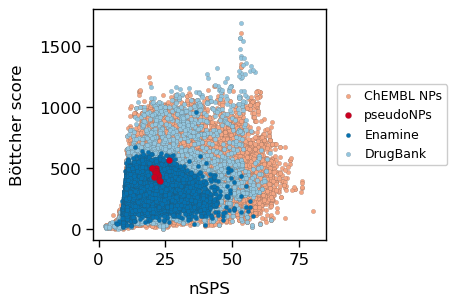

In [63]:
general_labels = {
    "pseudoNPs": "pseudoNPs",
    "chembl": "ChEMBL NPs",
    "enamine": "Enamine",
    "drugbank": "DrugBank"
}

general_colors = {
    "pseudoNPs": "#ca0020",
    "chembl": "#f4a582",
    "enamine": "#0571b0",
    "drugbank": "#92c5de"
}

general_order = {
    "pseudoNPs": 0.3,
    "chembl": 0,
    "enamine": 0.2,
    "drugbank": 0.1
}

general_size = {
    "pseudoNPs": 20,
    "chembl": 10,
    "enamine": 10,
    "drugbank": 10
}


fig = plt.figure()
ax = fig.add_subplot()
for data in scores.dataset.unique():
    if data != "Sceletium":
        tmp = scores.query("dataset == @data")
        ax.scatter(tmp["nSPS"], tmp["Boettcher"],
                   s=general_size[data],
                   c=general_colors[data],
                   edgecolors=[0.25, 0.25, 0.25],
                   linewidths=0.1,
                   label=general_labels[data],
                   zorder=general_order[data])

ax.set(xlim=(-2, 85), ylim=(-90, 1800))
plt.xlabel("nSPS")
plt.ylabel("Böttcher score")
plt.legend(loc="center right",
           bbox_to_anchor=(1.55, 0.5),
           fontsize=9,
           handlelength=1,
           frameon=True)
plt.savefig(FIG_DIR / "nSPS_vs_Boettcher_libraries.png",
            transparent=True, bbox_inches="tight")
plt.show()

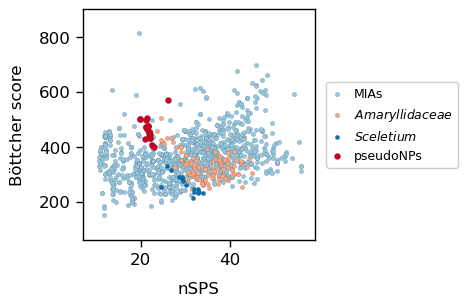

In [73]:
family_labels = {
    "pseudoNPs": "pseudoNPs",
    "MIAs": "MIAs",
    "Amaryllidaceae": r"$\mathit{Amaryllidaceae}$",
    "Sceletium": r"$\mathit{Sceletium}$"
}

family_colors = {
    "pseudoNPs": "#ca0020",
    "MIAs": "#92c5de",
    "Amaryllidaceae": "#f4a582",
    "Sceletium": "#0571b0"
}

family_order = {
    "pseudoNPs": 0.3,
    "MIAs": 0,
    "Amaryllidaceae": 0.1,
    "Sceletium": 0.2
}

family_size = {
    "pseudoNPs": 20,
    "MIAs": 10,
    "Amaryllidaceae": 10,
    "Sceletium": 10
}

fig = plt.figure()
ax = fig.add_subplot()
# for data in comparisons.new_set.unique():
for data in ["MIAs", "Amaryllidaceae", "Sceletium", "pseudoNPs"]:
    idx = comparisons3.query("new_set == @data").index
    ax.scatter(scores.loc[idx, "nSPS"], scores.loc[idx, "Boettcher"],
                s=family_size[data],
                c=family_colors[data],
                edgecolors=[0.25, 0.25, 0.25],
                linewidths=0.1,
                label=family_labels[data],
                zorder=family_order[data])

ax.set(xlim=(7, 59), ylim=(60, 900))

plt.xlabel("nSPS")
plt.ylabel("Böttcher score")
plt.legend(loc="center right",
           bbox_to_anchor=(1.64, 0.5),
           fontsize=9,
           handlelength=1,
           frameon=True)
plt.savefig(FIG_DIR / "nSPS_vs_Boettcher_alkaloids.png",
            transparent=True, bbox_inches="tight")
plt.show()

In [22]:
pmis_filepath = FILE_SOURCE / "PMIs.csv"
pmis = pd.read_csv(pmis_filepath)

In [30]:
densities = {}
for data in pmis.dataset.unique():
    if data not in ["pseudoNPs", "Sceletium"]:
        idx = pmis.query("dataset == @data").index
        t = pmis[["NPR1", "NPR2"]].iloc[idx].copy()
        t.dropna(axis=0, inplace=True)
        
        X, Y = np.mgrid[0:1:100j, 0:1:100j]
        positions = np.vstack((X.ravel(), Y.ravel()))
        kernel = gaussian_kde(t.transpose())
        Z = np.reshape(kernel(positions), X.shape)
        densities[data] = (X, Y, Z)

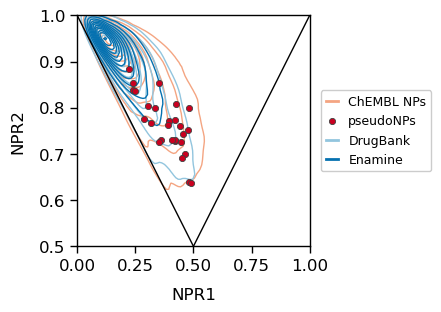

In [31]:
fig = plt.figure()
ax = fig.add_subplot()
elements = []
for data in pmis.dataset.unique():
    if data == "Sceletium":
        continue
    elif data == "pseudoNPs":
        tmp = pmis.query("dataset == @data")
        pt = ax.scatter(tmp["NPR1"], tmp["NPR2"],
                        s=general_size[data],
                        c=general_colors[data],
                        edgecolors=[0.25, 0.25, 0.25],
                        linewidths=0.6,
                        label=general_labels[data],
                        zorder=general_order[data])
        elements.append((data, pt))
    else:
        X, Y, Z = densities[data]
        ax.contour(X, Y, Z,
                   levels=12,
                   colors=general_colors[data],
                   linewidths=1,
                   vmin=1e-3,
                   extend="min",
                   zorder=general_order[data])
        elements.append((data, Line2D([], [], color=general_colors[data])))

ax.axline((0, 1), (0.5, 0.5), color="k", linewidth=1)
ax.axline((0.5, 0.5), (1, 1), color="k", linewidth=1)

ax.set_ylim((0.5, 1))

plt.xlabel("NPR1")
plt.ylabel("NPR2")
plt.legend([e[1] for e in elements],
           [general_labels[e[0]] for e in elements],
           loc="center right",
           bbox_to_anchor=(1.55, 0.5),
           fontsize=9,
           handlelength=1,
           frameon=True)
plt.savefig(FIG_DIR / "PMIs_libraries.png",
            transparent=True, bbox_inches="tight")
plt.show()

In [23]:
comparisons4 = prepare_alkaloid_comparison(pmis)

In [24]:
densities2 = {}
for data in comparisons4.new_set.unique():
    if data != "pseudoNPs":
        t = comparisons4.query("new_set == @data").loc[:, ["NPR1", "NPR2"]].copy()
        t.dropna(axis=0, inplace=True)
        
        X, Y = np.mgrid[0:1:100j, 0:1:100j]
        positions = np.vstack((X.ravel(), Y.ravel()))
        kernel = gaussian_kde(t.transpose())
        Z = np.reshape(kernel(positions), X.shape)
        densities2[data] = (X, Y, Z)

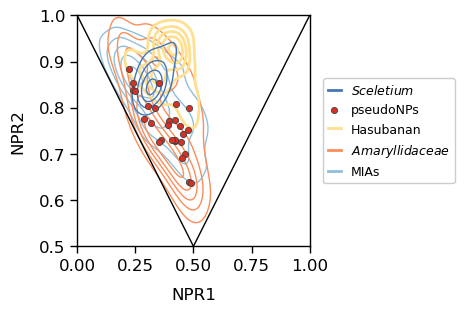

In [50]:
fig = plt.figure()
ax = fig.add_subplot()
elements = []
for data in comparisons4.new_set.unique():
    tmp = comparisons4.query("new_set == @data").copy()
    if data == "pseudoNPs":
        pt = ax.scatter(tmp["NPR1"], tmp["NPR2"],
                        s=family_size[data],
                        c=family_colors[data],
                        edgecolors=[0.25, 0.25, 0.25],
                        linewidths=0.6,
                        label=family_labels[data],
                        zorder=family_order[data])
        elements.append((data, pt))
    else:
        X, Y, Z = densities2[data]
        if data == "Hasubanan":
            ax.contour(X, Y, Z,
                    levels=5,
                    colors=family_colors[data],
                    linewidths=2,
                    vmin=1e-3,
                    extend="min",
                    zorder=family_order[data])
        else:
            ax.contour(X, Y, Z,
                    levels=5,
                    colors=family_colors[data],
                    linewidths=1,
                    vmin=1e-3,
                    extend="min",
                    zorder=family_order[data])
        elements.append((data, Line2D([], [], color=family_colors[data])))

ax.axline((0, 1), (0.5, 0.5), color="k", linewidth=1)
ax.axline((0.5, 0.5), (1, 1), color="k", linewidth=1)

ax.set_ylim((0.5, 1))

plt.xlabel("NPR1")
plt.ylabel("NPR2")
plt.legend([e[1] for e in elements],
           [family_labels[e[0]] for e in elements],
           loc="center right",
           bbox_to_anchor=(1.65, 0.5),
           fontsize=9,
           handlelength=1,
           frameon=True)
# plt.savefig(FIG_DIR / "PMIs_alkaloids.png",
#             transparent=True, bbox_inches="tight")
plt.savefig(FIG_DIR / "20250919_PMIs_alkaloids.png",
            transparent=True, bbox_inches="tight")
plt.show()

In [52]:
for n, group in comparisons3.groupby("new_set"):
    print(n, len(group))

Amaryllidaceae 107
Hasubanan 118
MIAs 1049
Sceletium 15
pseudoNPs 27


In [36]:
for n, group in pca_scores.groupby("dataset"):
    print(n, len(group))

Sceletium 15
chembl 78163
drugbank 11307
enamine 49974
pseudoNPs 27


In [3]:
alkaloids = pd.read_csv(HERE / "data" / "interim" / "alkaloids.csv")

In [4]:
family_labels = {
    "pseudoNPs": "pseudoNPs",
    "MIAs": "MIAs",
    "Amaryllidaceae": r"$\mathit{Amaryllidaceae}$",
    "Sceletium": r"$\mathit{Sceletium}$",
    "Hasubanan": "Hasubanan",
}

family_colors = {
    "pseudoNPs": "#d73027",
    "MIAs": "#91bfdb",
    "Amaryllidaceae": "#fc8d59",
    "Sceletium": "#4575b4",
    "Hasubanan": "#fee090",
}

family_order = {
    "pseudoNPs": 0.4,
    "MIAs": 0,
    "Amaryllidaceae": 0.1,
    "Sceletium": 0.3,
    "Hasubanan": 0.2
}

family_size = {
    "pseudoNPs": 20,
    "MIAs": 10,
    "Amaryllidaceae": 10,
    "Sceletium": 10,
    "Hasubanan": 10
}


In [5]:
alkaloids["new_set"].unique()

array(['Amaryllidaceae', 'MIAs', 'Hasubanan', 'Sceletium', 'pseudoNPs'],
      dtype=object)

In [6]:
data_scaffold = {}
for name in family_order.keys():
    group = alkaloids.query("new_set == @name")
    data_scaffold[name] = group["have_substructure"].sum() / len(group)

In [7]:
data_scaffold

{'pseudoNPs': np.float64(1.0),
 'MIAs': np.float64(0.16777883698760723),
 'Amaryllidaceae': np.float64(0.3364485981308411),
 'Sceletium': np.float64(1.0),
 'Hasubanan': np.float64(1.0)}

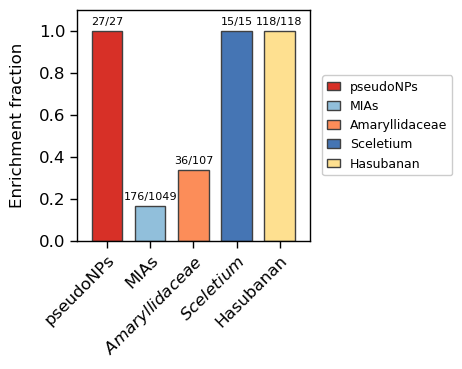

In [23]:
fig = plt.figure()
ax = fig.add_subplot()

parts = ax.bar(range(len(data_scaffold)), data_scaffold.values(),
               width=0.7,
               facecolor=family_colors.values(),
               edgecolor=[0.25, 0.25, 0.25],
               label=family_colors.keys())

for i, key in enumerate(data_scaffold.keys()):
    group = alkaloids.query("new_set == @key")
    text = f"{int(group['have_substructure'].sum())}/{len(group)}"
    ax.annotate(text,
                xy=(i, data_scaffold[key]),
                xytext=(0, 3),
                textcoords="offset points",
                fontsize=8,
                ha="center",
                va="bottom")

ax.set_xticks([x for x in range(len(data_scaffold))],
              labels=family_labels.values(),
              rotation=45, ha="right", rotation_mode="anchor")

ax.set_ylabel("Enrichment fraction")
ax.set_xlim(-0.7, 4.7)
ax.set_ylim(0, 1.1)

plt.legend(loc="center right",
           bbox_to_anchor=(1.64, 0.5),
           fontsize=9,
           handlelength=1,
           frameon=True)
plt.savefig(FIG_DIR / "20250924_scaffold_enrichment.png",
            transparent=True, bbox_inches="tight")
plt.show()


In [9]:
for name in family_order.keys():
    group = alkaloids.query("new_set == @name")
    print(group["have_substructure"].sum(), len(group))

27.0 27
176.0 1049
36.0 107
15.0 15
118.0 118


In [10]:
total = alkaloids["have_substructure"].sum()
data_scaffold_total = {}
for name in family_order.keys():
    group = alkaloids.query("new_set == @name")
    data_scaffold_total[name] = group["have_substructure"].sum() / total

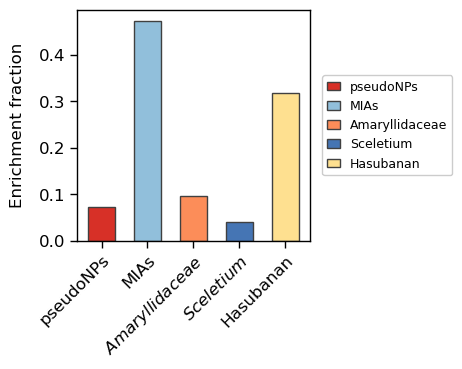

In [11]:
fig = plt.figure()
ax = fig.add_subplot()

parts = ax.bar(range(len(data_scaffold_total)), data_scaffold_total.values(),
               width=0.6,
               facecolor=family_colors.values(),
               edgecolor=[0.25, 0.25, 0.25],
               label=family_colors.keys())

ax.set_xticks([x for x in range(len(data_scaffold_total))],
              labels=family_labels.values(),
              rotation=45, ha="right", rotation_mode="anchor")

ax.set_ylabel("Enrichment fraction")

plt.legend(loc="center right",
           bbox_to_anchor=(1.64, 0.5),
           fontsize=9,
           handlelength=1,
           frameon=True)
plt.show()
